### Libraries

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline
%precision 4
plt.style.use('ggplot')

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats
import theano.tensor as tt
import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)
import pandas as pd
import imblearn
import numpy as np
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
#import scikitplot as skplt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn import linear_model
from tqdm.notebook import tqdm, trange
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import patsy
from theano import shared

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML2 Project/dataset.csv', low_memory = False)

#df

In [ ]:
# drop 1
df0 = df.drop(columns = ['TempSNO', 'city_id', 'Ethicity_language','specify_other', 'mortality_date'])
df0 = df0.replace(r'^\s*$', np.nan, regex=True)
df0 = df0.drop(columns = ['date_of_admission', 'date_of_surgery','date_of_discharge','or_entry_date', 'or_entry_time','or_exit_date', 'or_exit_time', 'intubation_time', 'extubation_time','skin_incision_start_date','skin_incision_start_time','skin_incision_closure_date','skin_incision_closure_time' ])

In [ ]:
# BMI
df0['BMI'] = pd.to_numeric(df0['BMI'],errors = 'coerce')
for i in trange(df0.shape[0]):
    df0['BMI'][i] = (df0['weight'][i])/(df0['height'][i]/100)**2

  0%|          | 0/5363 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# additional_icu_hours ref: readmission
df0['additional_icu_hours']= pd.to_numeric(df0['additional_icu_hours'],errors = 'coerce')
df0['additional_icu_hours'] = df0['additional_icu_hours'].fillna(0)
df0['additional_icu_hours'] = df0['additional_icu_hours'].apply(lambda x:x/24)

# additional_hours_ventilated ref: reintubated
df0['additional_hours_ventilated']= pd.to_numeric(df0['additional_hours_ventilated'],errors = 'coerce')
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].fillna(0)
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].apply(lambda x:x/24)


# red_blood_cells_units_A ref: intaop_blood_products
df0['red_blood_cell_units_A'] = pd.to_numeric(df0['red_blood_cell_units_A'],errors = 'coerce')
df0['red_blood_cell_units_A'] = df0['red_blood_cell_units_A'].fillna(0)

# fresh_frozen_plasma_units_A ref: intaop_blood_products
df0['fresh_frozen_plasma_units_A'] = pd.to_numeric(df0['fresh_frozen_plasma_units_A'],errors = 'coerce')
df0['fresh_frozen_plasma_units_A'] = df0['fresh_frozen_plasma_units_A'].fillna(0)

# cryoprecipitate_units_A ref: intaop_blood_products
df0['cryoprecipitate_units_A'] = pd.to_numeric(df0['cryoprecipitate_units_A'],errors = 'coerce')
df0['cryoprecipitate_units_A'] = df0['cryoprecipitate_units_A'].fillna(0)

# platelet_units_A ref: intaop_blood_products
df0['platelet_units_A'] = pd.to_numeric(df0['platelet_units_A'],errors = 'coerce')
df0['platelet_units_A'] = df0['platelet_units_A'].fillna(0)

# no_of_ima_distal ref: IMA
df0['no_of_ima_distal'] = pd.to_numeric(df0['no_of_ima_distal'],errors = 'coerce')
df0['no_of_ima_distal'] = df0['no_of_ima_distal'].fillna(0)

# DirectVision ref: IMA
df0['DirectVision'] = pd.to_numeric(df0['DirectVision'],errors = 'coerce')
df0['DirectVision'] = df0['DirectVision'].fillna(0)

# distal_anastomoses: Radial Conduit
df0['distal_anastomoses'] = pd.to_numeric(df0['distal_anastomoses'],errors = 'coerce')
df0['distal_anastomoses'] = df0['distal_anastomoses'].fillna(0)

# IABP_indication ref: IABP
df0['IABP_indication'] = pd.to_numeric(df0['IABP_indication'],errors = 'coerce')
df0['IABP_indication'] = df0['IABP_indication'].fillna(0)

# CPB_utilization_plan
df0['CPB_utilization_plan'] = pd.to_numeric(df0['CPB_utilization_plan'],errors = 'coerce')
df0['CPB_utilization_plan'] = df0['CPB_utilization_plan'].fillna(0)

# FemoralArteryandFemVein
df0['FemoralArteryandFemVein'] = pd.to_numeric(df0['FemoralArteryandFemVein'],errors = 'coerce')
df0['FemoralArteryandFemVein'] = df0['FemoralArteryandFemVein'].fillna(0)

# AortaandAtrialCaval
df0['AortaandAtrialCaval'] = pd.to_numeric(df0['AortaandAtrialCaval'],errors = 'coerce')
df0['AortaandAtrialCaval'] = df0['AortaandAtrialCaval'].fillna(0)

# cannulation_method_other
df0['cannulation_method_other'] = pd.to_numeric(df0['cannulation_method_other'],errors = 'coerce')
df0['cannulation_method_other'] = df0['cannulation_method_other'].fillna(0)

# None_F
df0['None_F'] = pd.to_numeric(df0['None_F'],errors = 'coerce')
df0['None_F'] = df0['None_F'].fillna(0)

# AorticCrossClamp
df0['AorticCrossClamp'] = pd.to_numeric(df0['AorticCrossClamp'],errors = 'coerce')
df0['AorticCrossClamp'] = df0['AorticCrossClamp'].fillna(0)

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion']

# PartialCrossClamp
df0['PartialCrossClamp'] = pd.to_numeric(df0['PartialCrossClamp'],errors = 'coerce')
df0['PartialCrossClamp'] = df0['PartialCrossClamp'].fillna(0)

# cross_clamp_time_min
df0['cross_clamp_time_min'] = pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].fillna(0)

# perfusion_time_min
df0['perfusion_time_min'] = pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].fillna(0)

# post_op_creatinine
df0['post_op_creatinine']= pd.to_numeric(df0['post_op_creatinine'],errors = 'coerce')
df0['post_op_creatinine'] = df0['post_op_creatinine'].interpolate(method = 'polynomial', order = 2)

# drainage_at_12_hours
df0['drainage_at_12_hours']= pd.to_numeric(df0['drainage_at_12_hours'],errors = 'coerce')
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].apply(lambda x:x/1000)

# drainage_at_24_hours
df0['drainage_at_24_hours']= pd.to_numeric(df0['drainage_at_24_hours'],errors = 'coerce')
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].apply(lambda x:x/1000)

df0.loc[df0['icu_visit'] == 0, 'initial_icu_hours'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_hours_ventilated'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_icu_stay'] = 0

# initial_hours_ventilated
df0['initial_hours_ventilated']= pd.to_numeric(df0['initial_hours_ventilated'],errors = 'coerce')
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].interpolate(method = 'polynomial', order = 2)
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].apply(lambda x:x/24)

# initial_icu_hours
df0['initial_icu_hours']= pd.to_numeric(df0['initial_icu_hours'],errors = 'coerce')
df0['initial_icu_hours'] = df0['initial_icu_hours'].interpolate(method = 'polynomial', order = 2)


# initial_icu_stay
df0['initial_icu_stay']= pd.to_numeric(df0['initial_icu_stay'],errors = 'coerce')
df0['initial_icu_stay'] = df0['initial_icu_stay'].interpolate(method = 'polynomial', order = 2)
df0['initial_icu_stay'] = df0['initial_icu_stay'].apply(lambda x:x/24)

# BPsystolic
df0['BPsystolic'] = pd.to_numeric(df0['BPsystolic'],errors = 'coerce')
m1 = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].mean()
m2 = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].mean()
df0.loc[df0['hypertension'] == 1, 'BPsystolic'] = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].fillna(m1)#isnull().sum()
df0.loc[df0['hypertension'] == 0, 'BPsystolic'] = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].fillna(m2)#isnull().sum()

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion'].fillna(0)

# LM_specify, weight, height, initial_icu_hours
df0 = df0.drop(columns = ['LM_specify','weight','height','initial_icu_hours'])

# inubation and extubation
df0['intubation_date'] = pd.to_datetime(df0.intubation_date)
df0['extubation_date'] = pd.to_datetime(df0.extubation_date)
df0['intubation_to_extubation'] = (df0['extubation_date'] - df0['intubation_date']).dt.days

# cross_clamp_time_min
df0['cross_clamp_time_min']= pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].apply(lambda x:x/1440)

# perfusion_time_min
df0['perfusion_time_min']= pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].apply(lambda x:x/1440)

# ejection_fraction
df0['ejection_fraction']= pd.to_numeric(df0['ejection_fraction'],errors = 'coerce')
df0['ejection_fraction'] = df0['ejection_fraction'].apply(lambda x:x/100)

# gender_id
df0['gender_id'] = df0['gender_id'].apply(lambda x: x-1) # from male = 1 & female = 2, to , male = 0 & female = 1

# Cardiac_Presentation_on_Admission
df0['Cardiac_Presentation_on_Admission'] = df0['Cardiac_Presentation_on_Admission'].apply(lambda x: x-1) # 

# drop intubation and extubation
df0 = df0.drop(columns = ['intubation_date','extubation_date'])

# drop na
df0 = df0.dropna()
i_2_e = df0.pop('intubation_to_extubation')
df0.insert(0,'intubation_to_extubation', i_2_e)
df0 = df0.apply(pd.to_numeric)
df0 = df0.loc[df0['drainage_at_12_hours'] >=0 ]
df0 = df0.loc[df0['drainage_at_24_hours'] >=0 ]
df0 = df0.loc[df0['post_op_creatinine'] >=0 ]
df0 = df0.loc[df0['intubation_to_extubation'] >= 0]
df0 = df0.loc[df0['initial_hours_ventilated'] >= 0]
df0

intubation_to_extubation  ...  in_hospital_mortality
0                          1.0  ...                      0
1                          1.0  ...                      0
2                          0.0  ...                      0
4                          1.0  ...                      0
5                          1.0  ...                      0
...                        ...  ...                    ...
5347                       1.0  ...                      0
5350                       1.0  ...                      0
5355                       0.0  ...                      0
5356                       1.0  ...                      0
5361                       2.0  ...                      0

[5305 rows x 121 columns]

# Baseline Model

In [ ]:
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

X_shared = shared(X_train.values)
Y_shared = shared(Y_train.values)
 


In [ ]:
len(Y_test)

1061

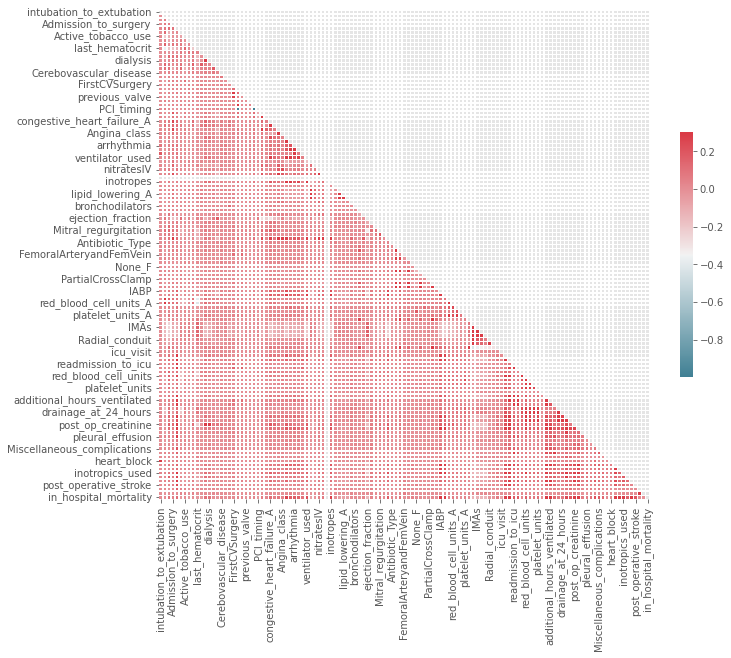

In [ ]:
# Compute the correlation matrix
corr = df0.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax,
)

# Model  (Without Feature Selection)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 59000
Interrupted at 58,999 [29%]: Average Loss = 44,539
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 1655 seconds.
There were 424 divergences after tuning. Increase `target_accept` or reparameterize.
There were 592 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (4366) in plot_posterior, generating only 40 plots
  UserWarning,


                     mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
alpha             -13.462  8.271 -27.874  ...     920.0     798.0    1.0
beta[0, 0]         -1.220  0.913  -2.846  ...     553.0     541.0    1.0
beta[0, 1]          2.271  1.845  -1.245  ...     558.0     570.0    1.0
beta[0, 2]          0.193  0.068   0.066  ...     702.0     796.0    1.0
beta[0, 3]          0.340  0.277  -0.153  ...     790.0     956.0    1.0
...                   ...    ...     ...  ...       ...       ...    ...
logistic[0, 4239]   0.000  0.000   0.000  ...     391.0     628.0    1.0
logistic[0, 4240]   0.000  0.000   0.000  ...     728.0     553.0    1.0
logistic[0, 4241]   0.000  0.000   0.000  ...     436.0     581.0    1.0
logistic[0, 4242]   0.000  0.000   0.000  ...     403.0     529.0    1.0
logistic[0, 4243]   0.000  0.000   0.000  ...     508.0     523.0    1.0

[4366 rows x 9 columns]


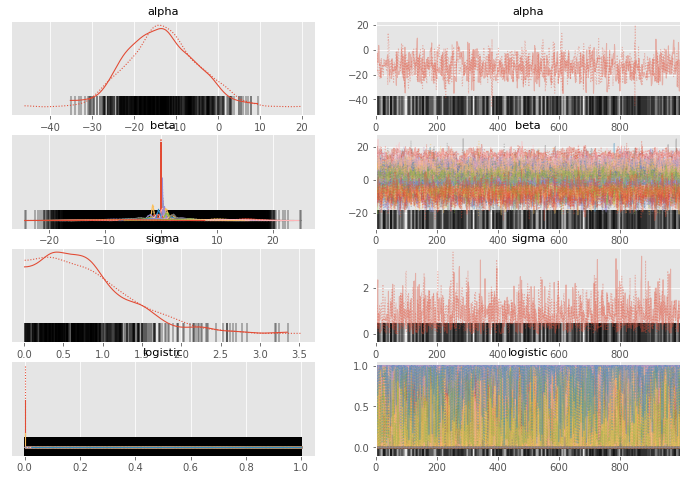

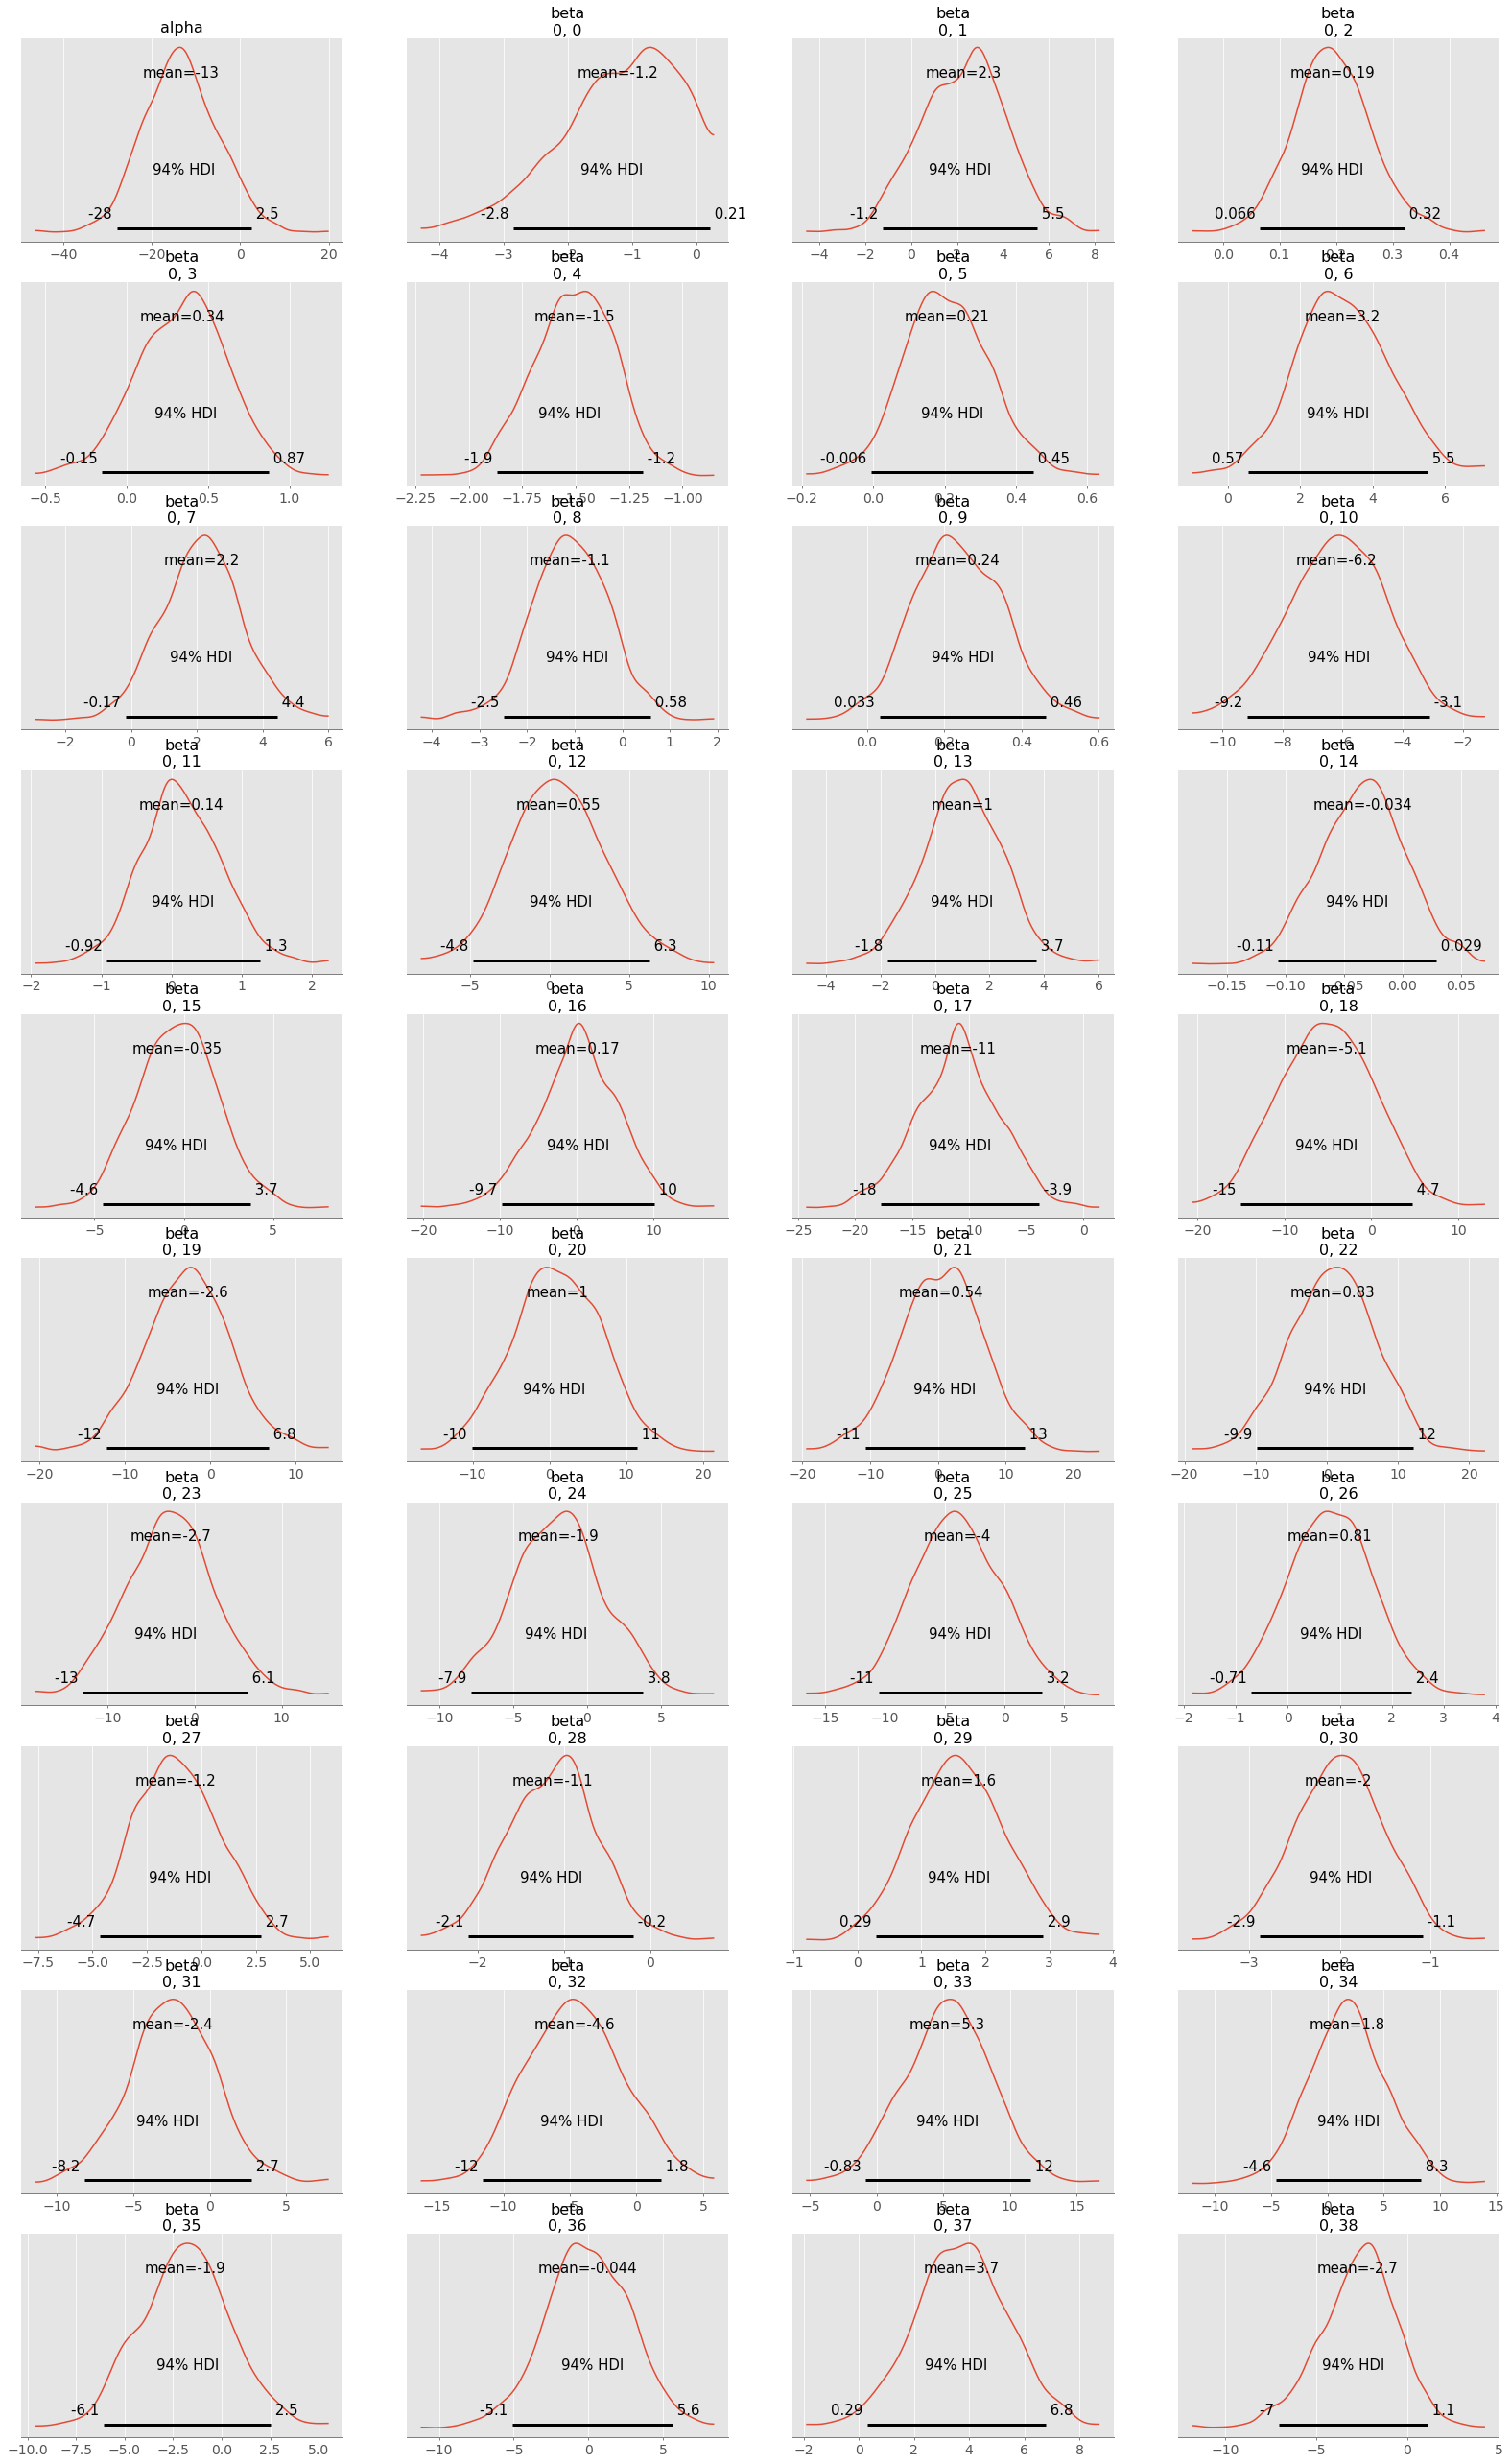

In [ ]:
#coords = {"observation": df0.index.values}
model = pm.Model()
with model:
    alpha = pm.Normal('alpha', mu=4, sd=10)
    betas = pm.Normal('beta', mu=1, sd=6, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=1)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    mu = pm.math.dot(betas, X_shared.T) + alpha
    logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    # likelihood
    y = pm.Bernoulli("y",p=logistic, observed=Y_shared)
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    step = pm.NUTS(target_accept = 0.95)
    trace = pm.sample(1000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 2000)

    arviz.plot_trace(trace)
    arviz.plot_posterior(trace)
    print(pm.summary(trace))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model:
    post_pred = pm.sample_posterior_predictive(trace, samples=X_test.shape[0])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ROC is : 0.829958212793314


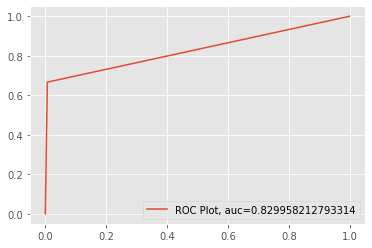

In [ ]:
y_pred = post_pred['y'][-1].ravel().tolist()
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Models (With Feature Selection)

## Chi-2 Feature Selection

In [ ]:
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only



# Feature selection based on chi2 values
chi2_selector = SelectKBest(chi2)
chi2_selector.fit(data_X, data_Y)


chi2_scores = pd.DataFrame(list(zip(data_X.columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns = ['Feature', 'Score', 'p_val'])
print("Chi-2 Scores\n",chi2_scores)
boolean_list = chi2_scores['Score'] > 10
new_data_X = data_X.loc[:,boolean_list.values.tolist()]
#new_data_X = new_data_X.drop(['patient_age'], axis = 1)
new_data = new_data_X
new_data['in_hospital_mortality'] = df0['in_hospital_mortality']
print("\nNew selected features\n:" , new_data.columns)

X_train, X_test, Y_train, Y_test = train_test_split(new_data_X, data_Y,test_size = 0.20 ,random_state=42)


#scaler = StandardScaler() # scaling
# Fit on training set only.
#scaler.fit(X_train)
# Apply transform to both the training set and the test set.
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) 

X_shared = shared(X_train.values)
Y_shared = shared(Y_train.values)

Chi-2 Scores
                         Feature       Score          p_val
0      intubation_to_extubation   20.133528   7.221953e-06
1                     gender_id    0.008134   9.281391e-01
2                   patient_age   53.029508   3.285751e-13
3          Admission_to_surgery   26.090947   3.257076e-07
4      LOS_Surgery_to_discharge  100.235234   1.353305e-23
..                          ...         ...            ...
115         atrial_fibrillation  133.261751   7.924390e-31
116     dialysis_newly_required  561.866253  3.301015e-124
117       post_operative_stroke  228.616395   1.194229e-51
118                sternum_deep    0.009665   9.216844e-01
119  or_for_sternal_debridement    1.098138   2.946751e-01

[120 rows x 3 columns]

New selected features
: Index(['intubation_to_extubation', 'patient_age', 'Admission_to_surgery',
       'LOS_Surgery_to_discharge', 'last_cretenine_preop', 'dialysis',
       'congestive_heart_failure_A', 'NYHA_class',
       'Cardiac_Presentation_on_A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Bayesian Model (With only Chi-2 Feature Selection)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 117900
Interrupted at 117,899 [58%]: Average Loss = 7,047.3
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 390 seconds.
There were 476 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1006 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (4305) in plot_posterior, generating only 40 plots
  UserWarning,


                    mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
alpha             -8.925  8.678 -26.161  ...     200.0     274.0   1.01
beta[0, 0]        -1.997  1.657  -5.231  ...     143.0     313.0   1.01
beta[0, 1]        -0.181  0.156  -0.447  ...     198.0     213.0   1.01
beta[0, 2]         0.010  0.628  -1.149  ...     274.0     461.0   1.01
beta[0, 3]        -1.078  0.469  -1.910  ...     173.0     313.0   1.02
...                  ...    ...     ...  ...       ...       ...    ...
logistic[0, 4239]  0.000  0.000   0.000  ...     237.0     301.0   1.01
logistic[0, 4240]  0.998  0.029   1.000  ...     330.0     815.0   1.00
logistic[0, 4241]  0.000  0.000   0.000  ...     204.0     378.0   1.03
logistic[0, 4242]  0.000  0.000   0.000  ...     243.0     393.0   1.00
logistic[0, 4243]  0.000  0.000   0.000  ...     247.0     530.0   1.01

[4305 rows x 9 columns]


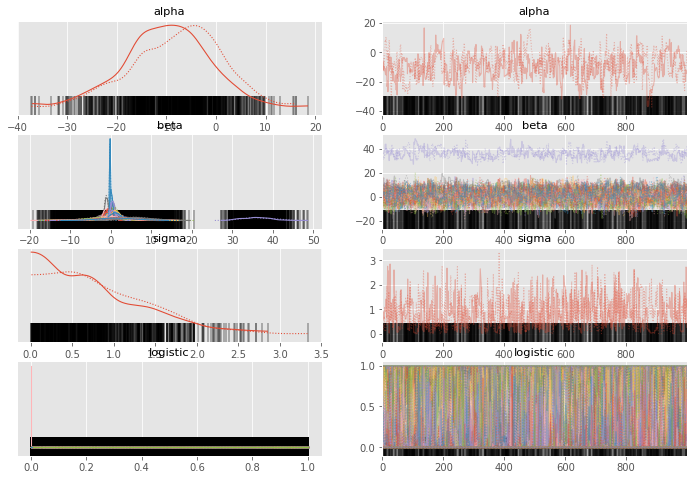

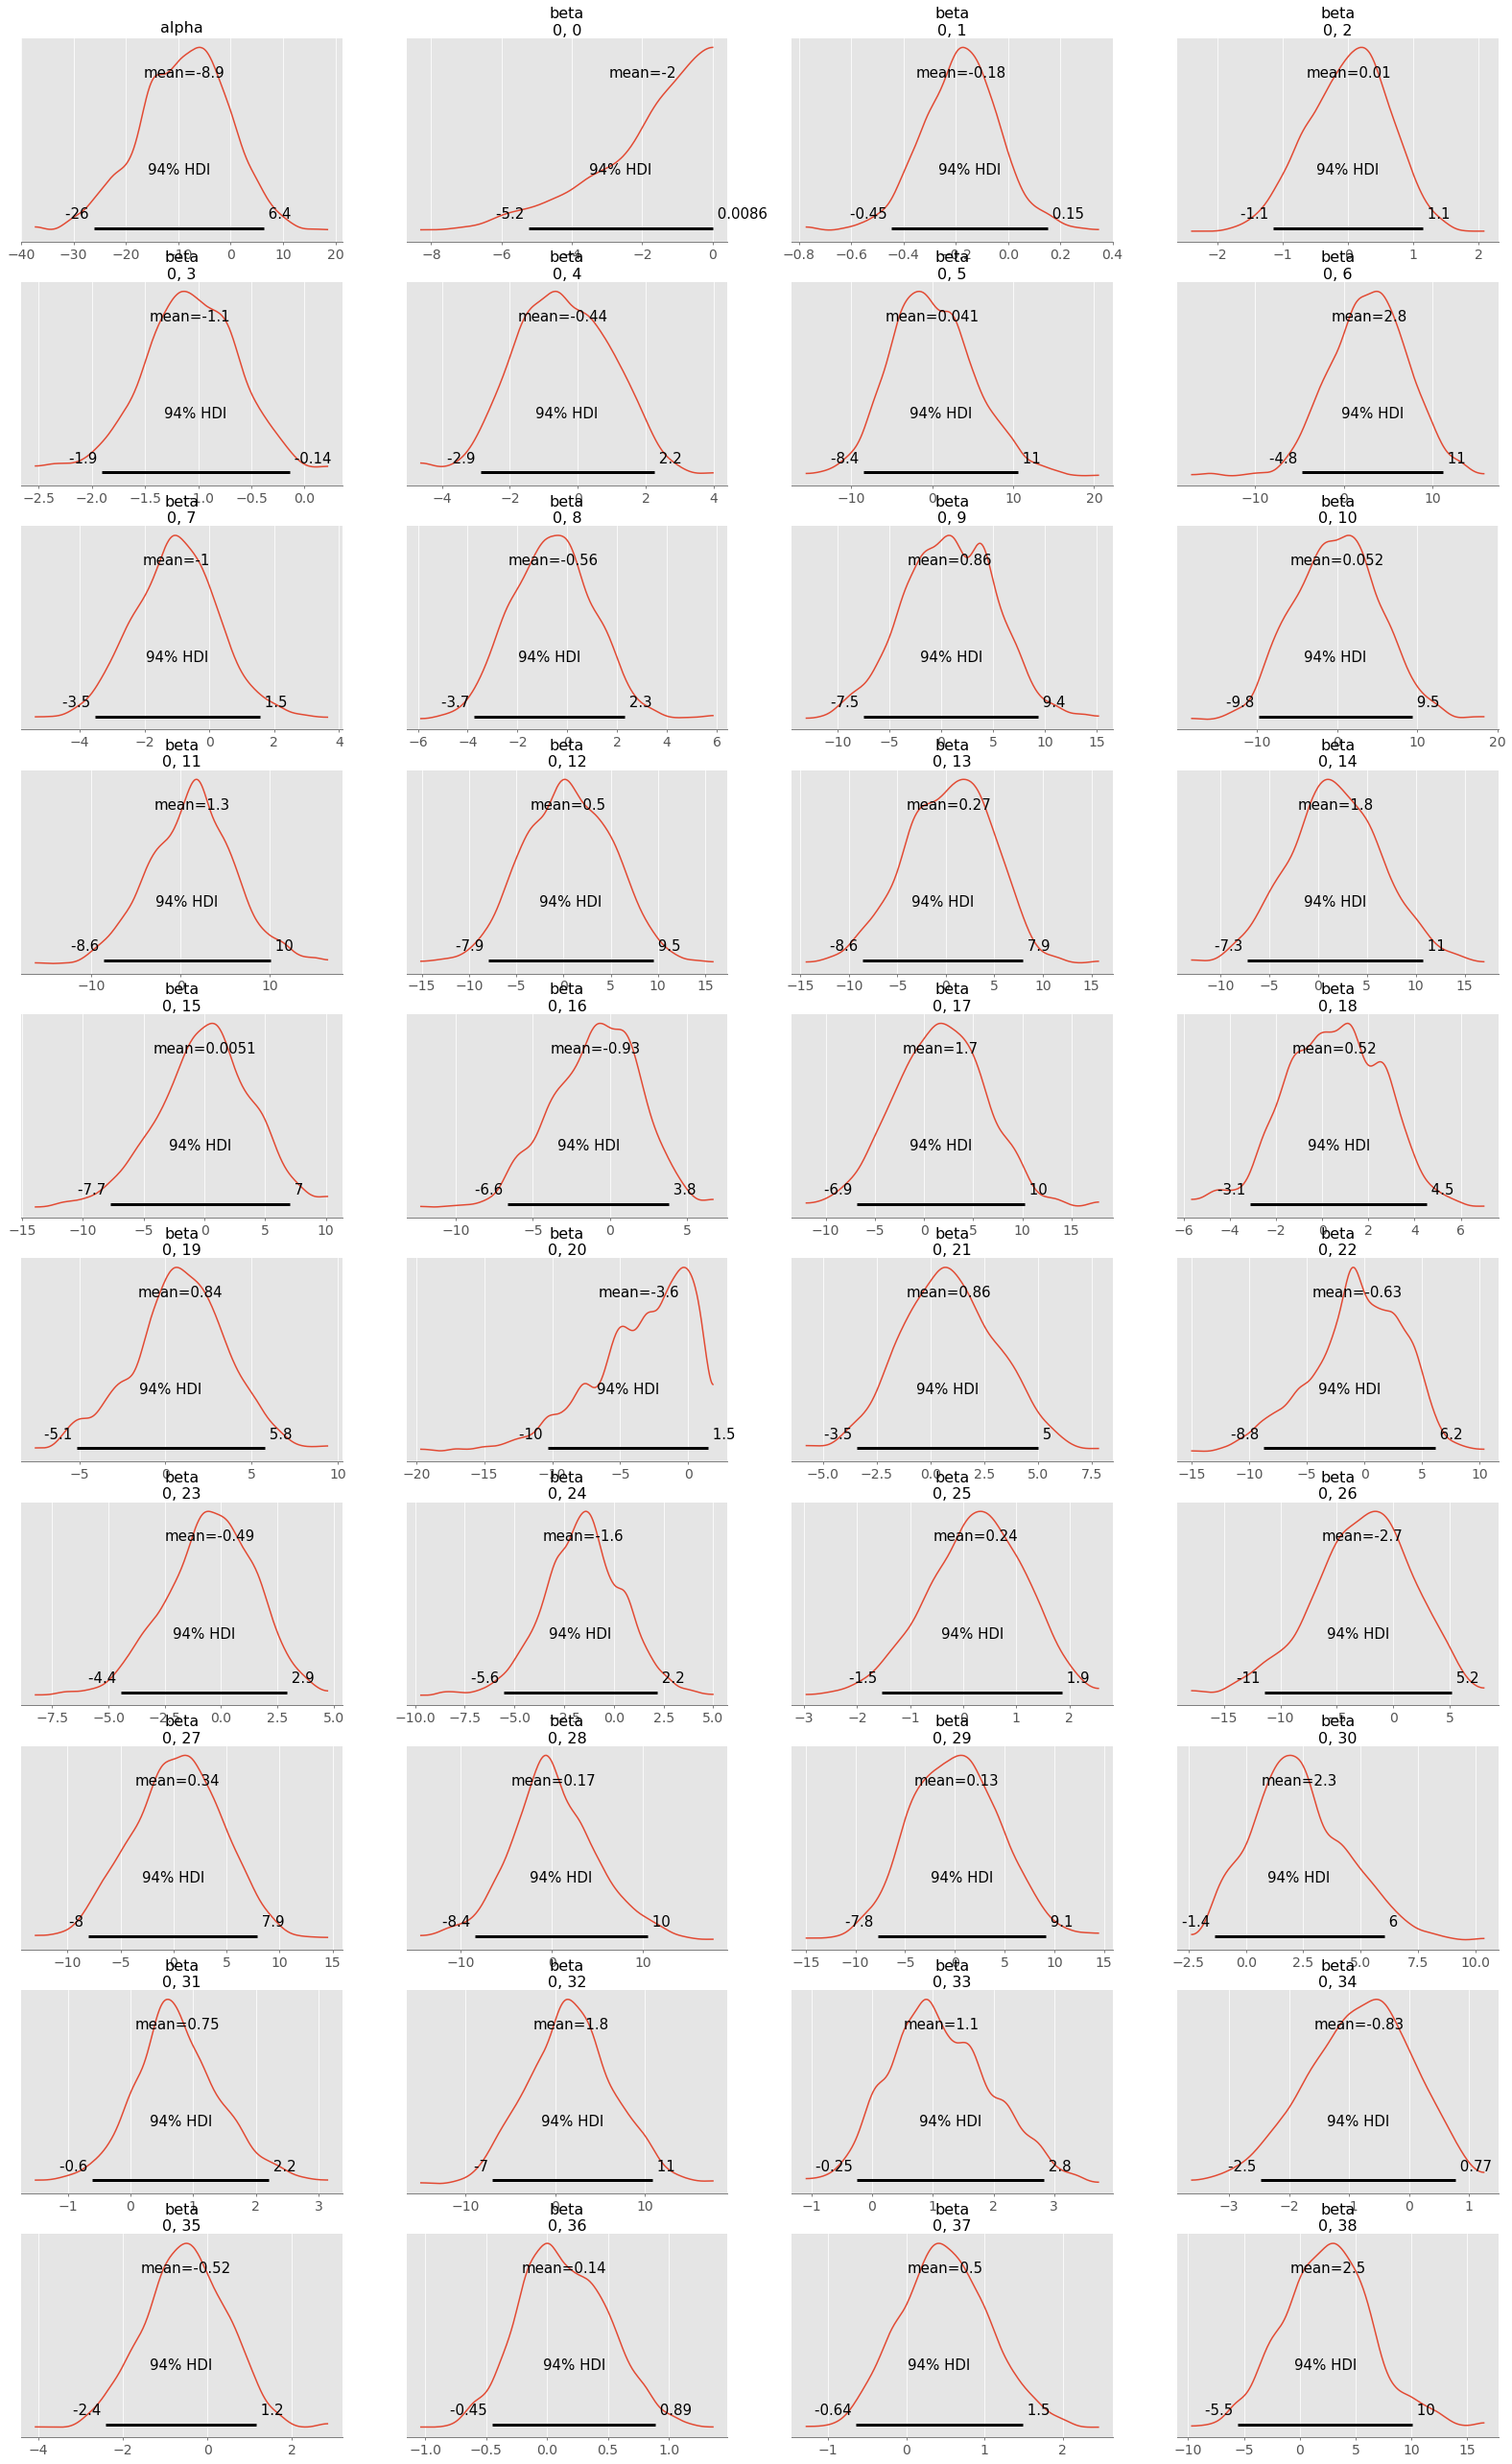

In [ ]:

#coords = {"observation": df0.index.values}
model = pm.Model()
with model:
    alpha = pm.Normal('alpha', mu=4, sd=10)
    betas = pm.Normal('beta', mu=1, sd=6, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=1)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    mu = pm.math.dot(betas, X_shared.T) + alpha
    logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    # likelihood
    y = pm.Bernoulli("y",p=logistic, observed=Y_shared)
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    step = pm.NUTS(target_accept = 0.95)
    trace = pm.sample(1000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 2000)

    arviz.plot_trace(trace)
    arviz.plot_posterior(trace)
    print(pm.summary(trace))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ROC is : 0.948545101842871


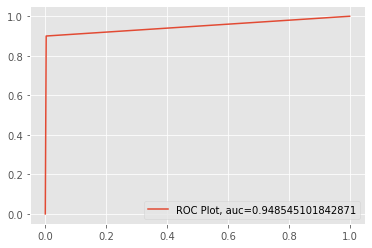

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model:
    post_pred = pm.sample_posterior_predictive(trace, samples=X_test.shape[0])

y_pred = post_pred['y'][-1].ravel().tolist()
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# GLM (With Chi-2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 38400
Interrupted at 38,399 [19%]: Average Loss = 1,687.2
Sequential sampling (2 chains in 1 job)
NUTS: [post_operative_stroke, dialysis_newly_required, atrial_fibrillation, inotropics_used, ventricular_arrythmia, cardiac_arrest, heart_failure, Miscellaneous_complications, multi_system_failure, gastro_intestinal_complication, pleural_effusion, pneumonia, prolonged_ventilation, post_op_creatinine, Reopened_postCABG, hospital_complications, drainage_at_24_hours, readmitted, additional_hours_ventilated, reintubated_hospital_stay, platelet_units, cryoprecipitate_units, fresh_frozen_plasma_units, red_blood_cell_units, additional_icu_hours, readmission_to_icu, initial_icu_stay, initial_hours_ventilated, DirectVision, no_of_ima_distal, IMAs, noda_arterial_conduits, platelet_units_A, fresh_frozen_plasma_units_A, red_blood_cell_units_A, IABP_indication, IABP, cannulation_method_other, CABG_status, Mitral_regurgitation, inotropes, anti_coagulants, nitratesIV, ventilator_u

Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 3115 seconds.
There were 4444 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8821 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/traceplot.py:210: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (59), generating only 20 plots
  UserWarning,


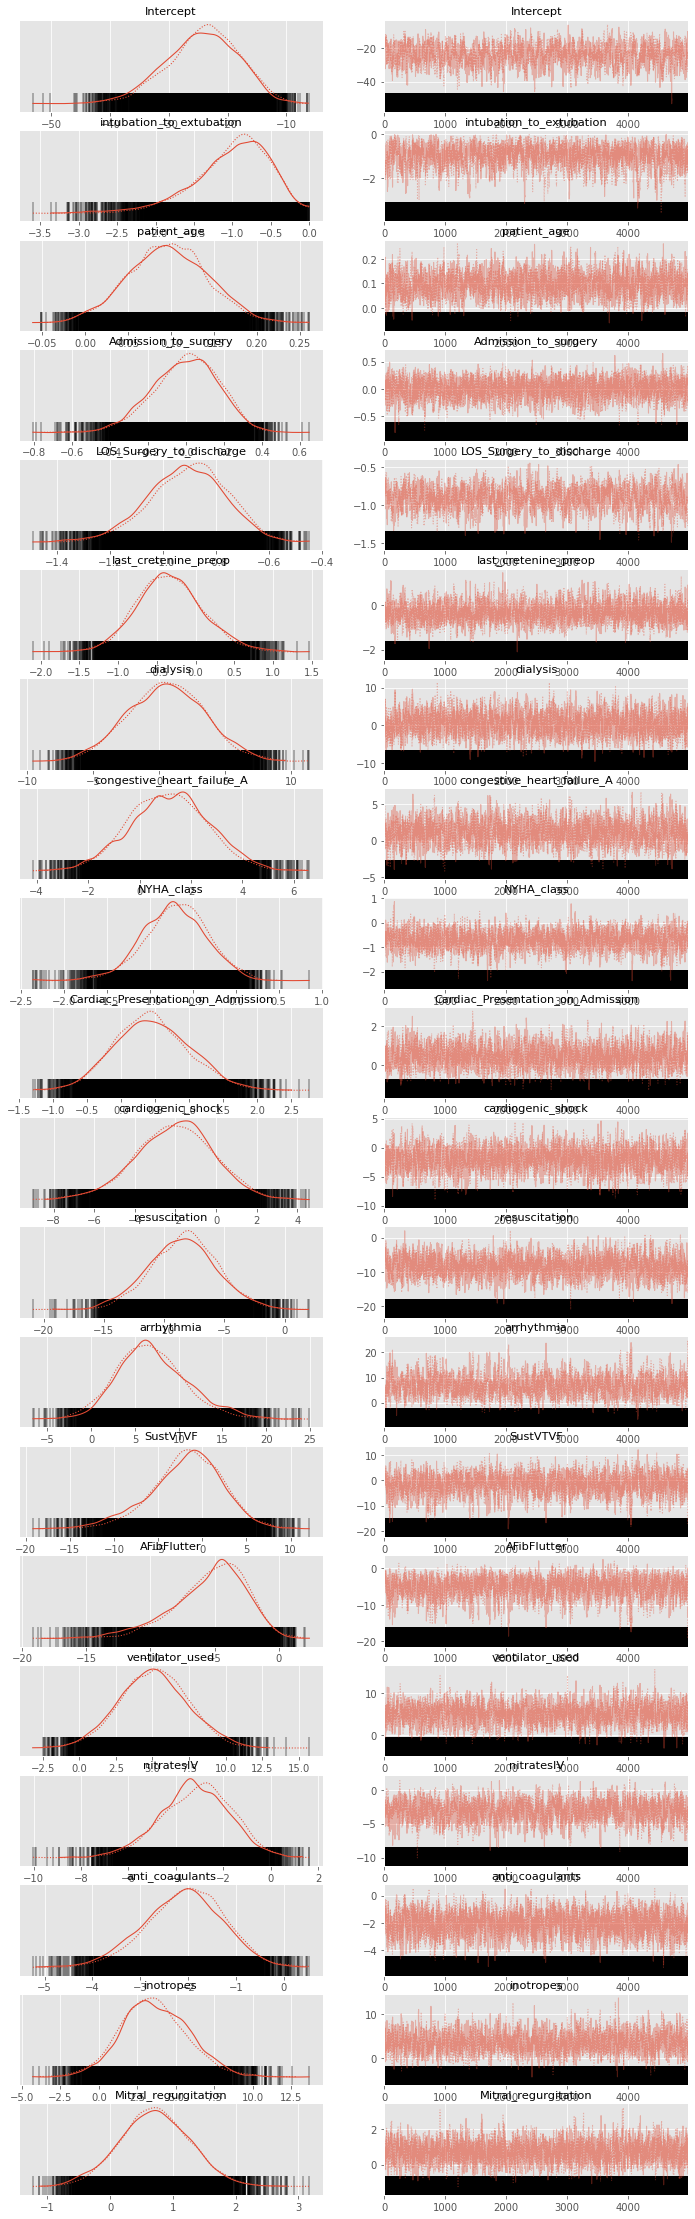

In [ ]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

data_Y, data_X = patsy.dmatrices(formula_like=formula_from_cols(new_data,'in_hospital_mortality'), data=new_data)
data_Y = np.asarray(data_Y).flatten()
labels = data_X.design_info.column_names
data_X = np.asarray(data_X)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

with pm.Model() as glm_model:
    # Set data container.
    data = pm.Data("data", X_train)
    # Define GLM family.
    family = pm.glm.families.Binomial()
    # Set priors.
    priors = {
        "Intercept": pm.Normal.dist(mu=0, sd=10),
        "beta": pm.Normal.dist(mu=0, sd=10, shape = X_train.shape[1]),
        #"x2": pm.Normal.dist(mu=0, sd=10),
        #"x1:x2": pm.Normal.dist(mu=0, sd=10),
    }
    # Specify model.
    pm.glm.GLM(y=Y_train, x=data, family=family, intercept=False, labels=labels)
    # Configure sampler.
    trace = pm.sample(5000, chains=2, tune=3000, target_accept=0.95, init = 'advi+adapt_diag')
    arviz.plot_trace(data=trace)
    arviz.summary(trace)


/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ROC is : 0.8794536049143227


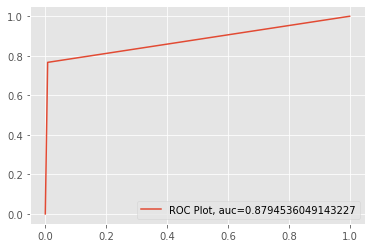

In [ ]:
# Compute the point prediction by taking the mean
# and defining the category via a threshold.

# Update data reference.
pm.set_data({"data": X_test}, model=glm_model)
# Generate posterior samples.
ppc_test = pm.sample_posterior_predictive(trace, model=glm_model, samples=X_test.shape[0])
p_test_pred = ppc_test["y"].mean(axis=0)
y_pred = (p_test_pred >= 0.5).astype("int")
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Correlation Feature Selection

In [ ]:
# Correlation Matrix
dataframe = new_data
corrMatrix = dataframe.corr() # Finding correlation between the features of the dataset
corr_Df = pd.DataFrame(corrMatrix) # Correlation dataframe
#corr_Df = corr_Df.drop('p_id', 1)

print("\n\nCorrelation Matrix\n\n", corr_Df)

# Correlated Variable Pair
lis = []
for i in range(len(corr_Df.columns)):
  condition = corr_Df.iloc[:,i] > 0.65
  val = corr_Df.index[condition]
  if len(val) > 0:
    lis.append(val)

print("\n\nCorrelated Variable Pair\n\n", lis)

var_list = []

for i in range(len(lis)):
  var_names = lis[i][0] 
  print(var_names)
  if var_names not in var_list:
    var_list.append(var_names)

len(var_list)

print("\n\nFiltered down features to be used for model: \n\n", var_list)

new_new_data = df0[var_list]
new_new_data['in_hospital_mortality'] = df0['in_hospital_mortality']
data_X = new_new_data.iloc[:,0:len(new_new_data.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  new_new_data.iloc[:,len(new_new_data.columns)-1] # target variable only
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)


#scaler = StandardScaler() # scaling
# Fit on training set only.
#scaler.fit(X_train)
# Apply transform to both the training set and the test set.
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) 

X_shared = shared(X_train.values)
Y_shared = shared(Y_train.values)



Correlation Matrix

                                    intubation_to_extubation  ...  in_hospital_mortality
intubation_to_extubation                           1.000000  ...               0.001874
patient_age                                       -0.000210  ...               0.087940
Admission_to_surgery                              -0.002113  ...               0.054335
LOS_Surgery_to_discharge                           0.022423  ...               0.113636
last_cretenine_preop                               0.001172  ...               0.105999
dialysis                                          -0.000148  ...               0.100675
congestive_heart_failure_A                        -0.001096  ...               0.112722
NYHA_class                                        -0.013470  ...               0.051653
Cardiac_Presentation_on_Admission                  0.012725  ...               0.084274
cardiogenic_shock                                  0.006611  ...               0.268139
resuscita

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Bayesian Model (With Chi-2 & Correlation Feature Selection)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 37500
Interrupted at 37,499 [18%]: Average Loss = 21,503
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 473 seconds.
There were 189 divergences after tuning. Increase `target_accept` or reparameterize.
There were 214 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (4294) in plot_posterior, generating only 40 plots
  UserWarning,


                     mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
alpha             -11.654  3.069 -17.365  ...     588.0     733.0   1.00
beta[0, 0]         -0.918  0.332  -1.551  ...     405.0     615.0   1.01
beta[0, 1]          0.034  0.033  -0.030  ...     674.0    1024.0   1.00
beta[0, 2]          0.010  0.124  -0.228  ...     806.0     781.0   1.00
beta[0, 3]         -0.526  0.095  -0.684  ...     243.0     114.0   1.00
...                   ...    ...     ...  ...       ...       ...    ...
logistic[0, 4239]   0.000  0.000   0.000  ...     304.0     556.0   1.01
logistic[0, 4240]   0.962  0.078   0.844  ...    1086.0    1026.0   1.00
logistic[0, 4241]   0.000  0.000   0.000  ...     562.0     674.0   1.00
logistic[0, 4242]   0.000  0.000   0.000  ...     505.0     642.0   1.00
logistic[0, 4243]   0.000  0.000   0.000  ...     553.0     740.0   1.01

[4294 rows x 9 columns]


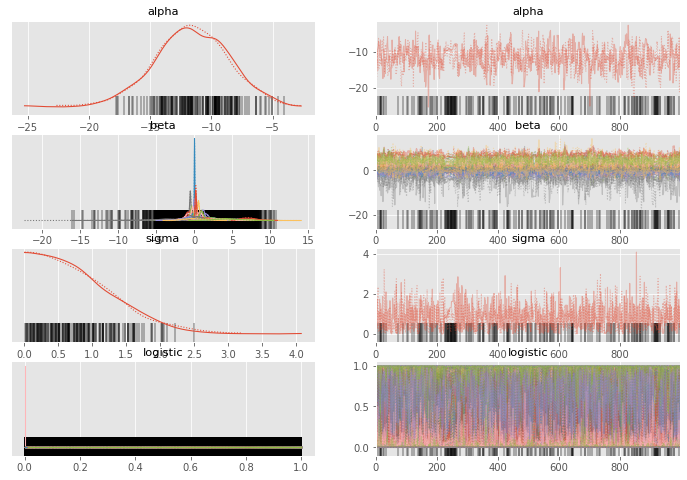

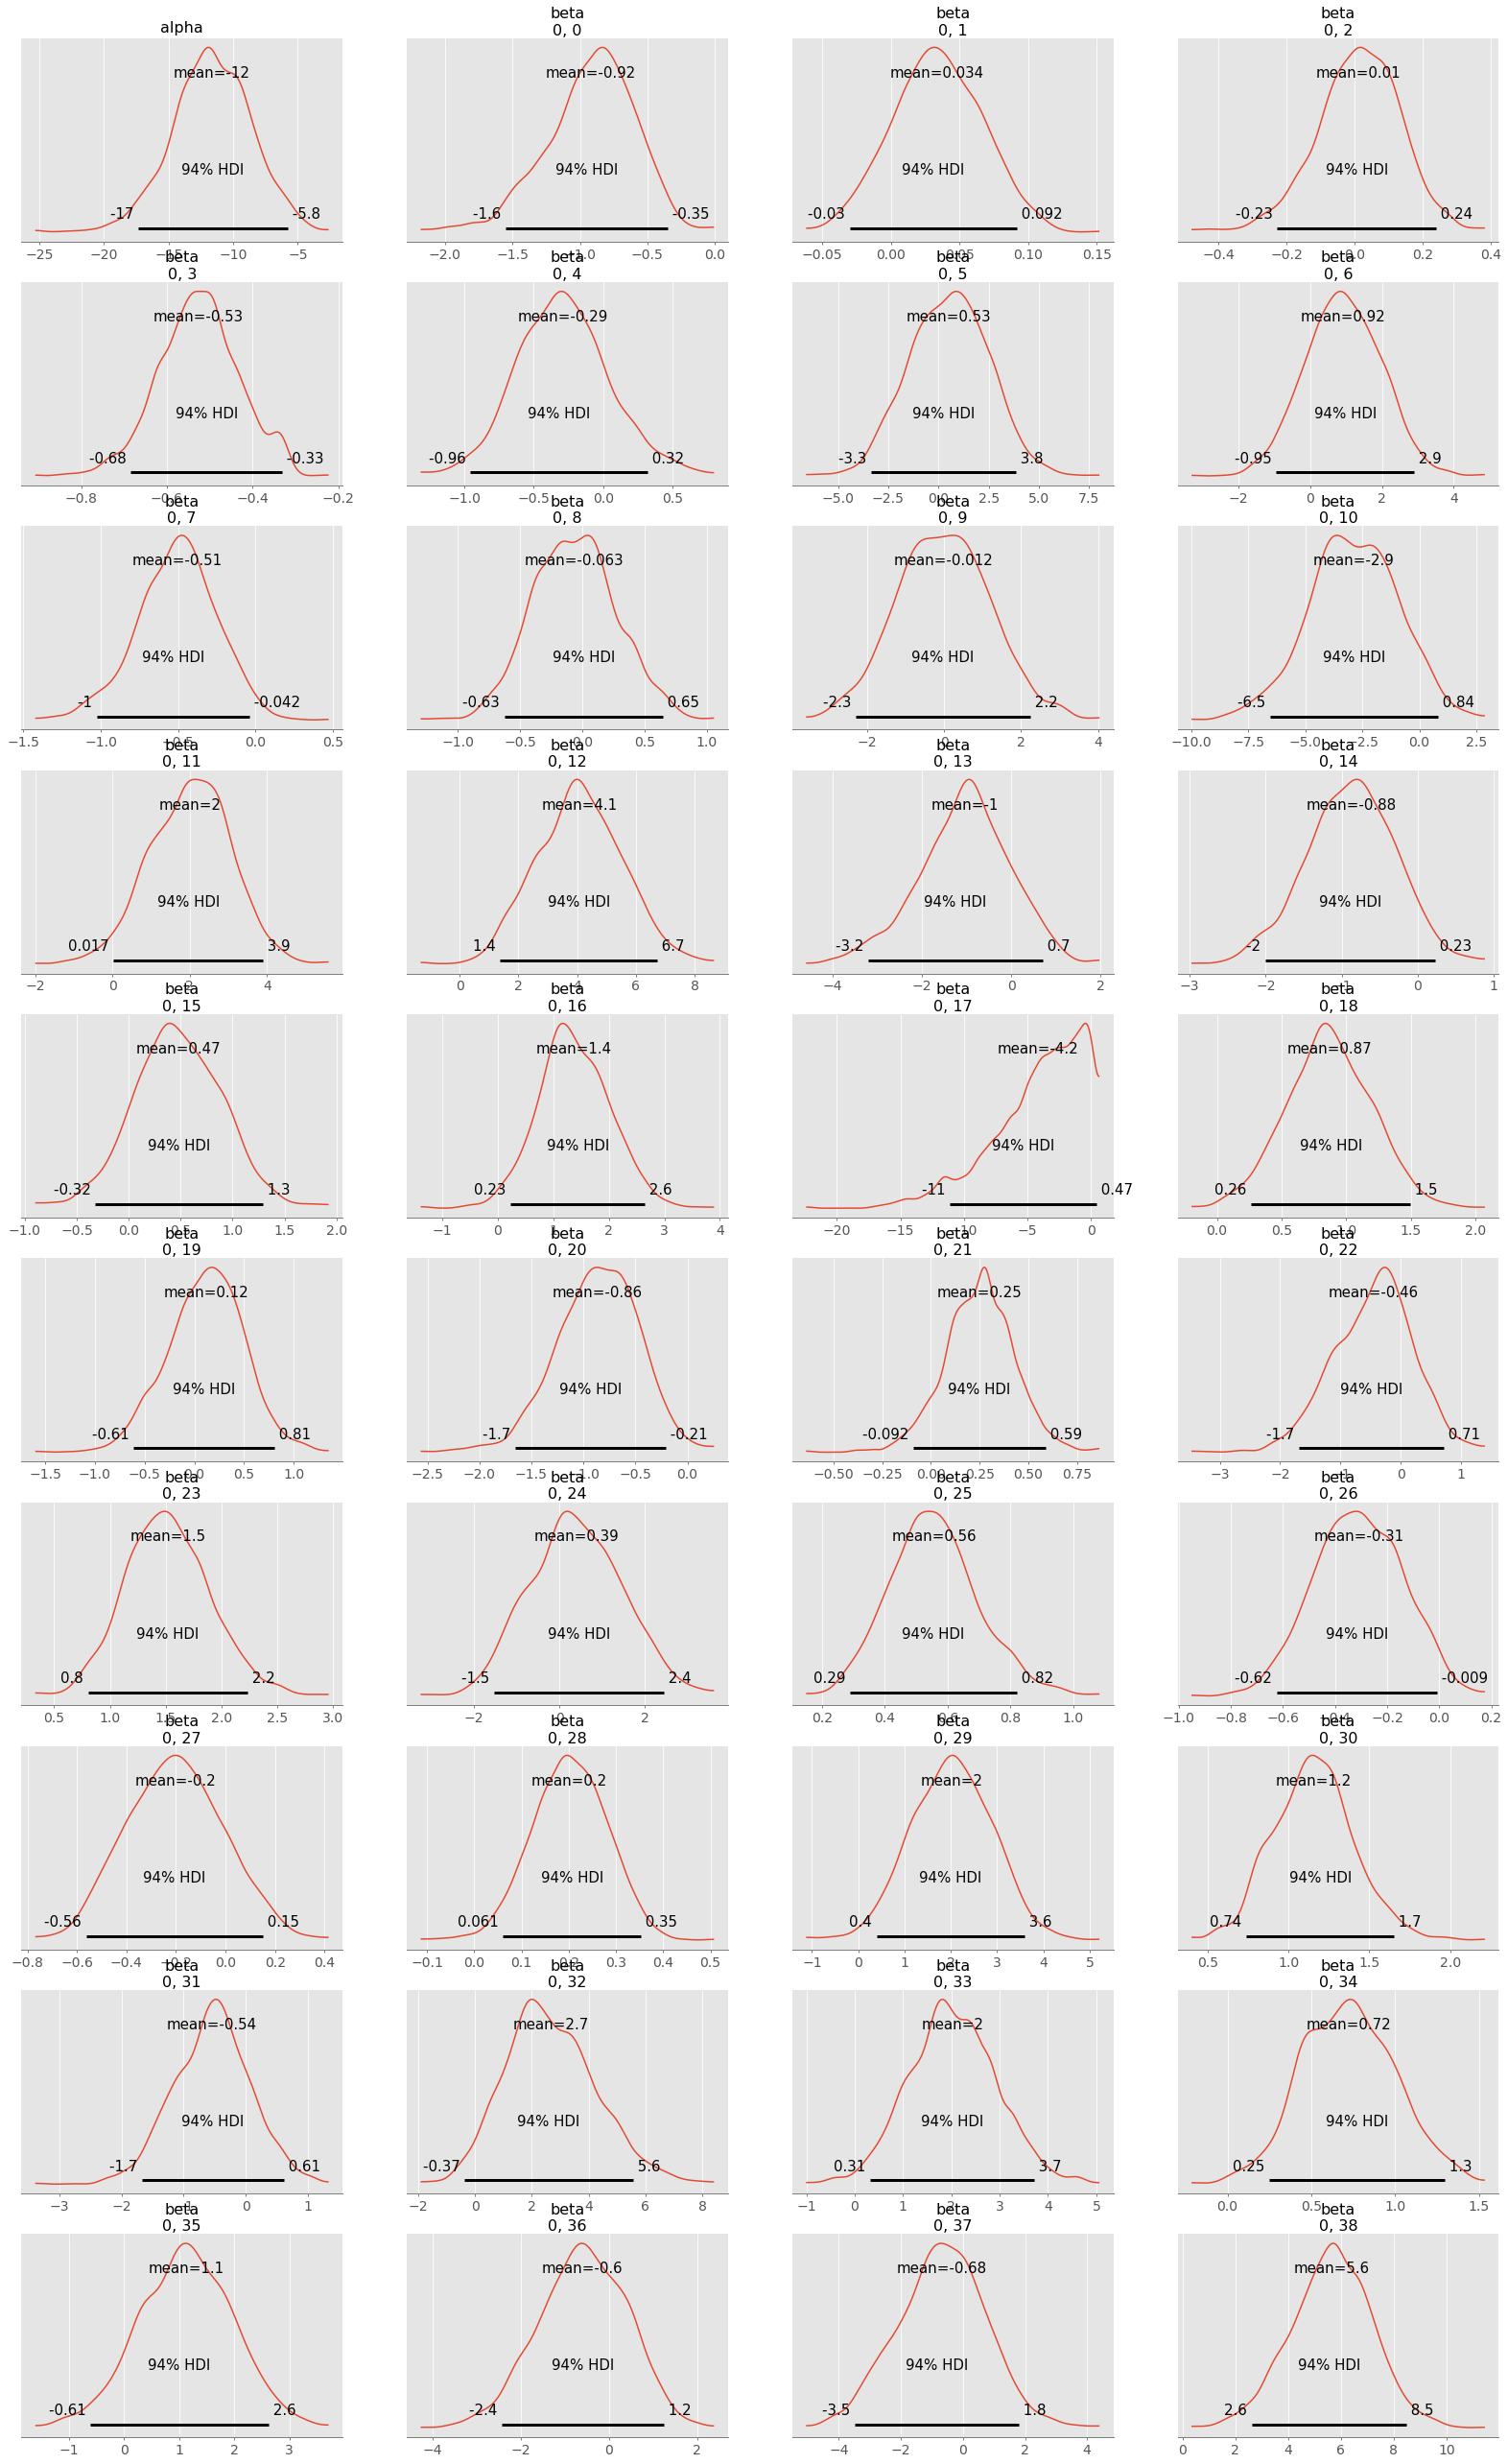

In [ ]:

#coords = {"observation": df0.index.values}
model = pm.Model()
with model:
    alpha = pm.Normal('alpha', mu=4, sd=10)
    betas = pm.Normal('beta', mu=1, sd=6, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=1)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    mu = pm.math.dot(betas, X_shared.T) + alpha
    logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    # likelihood
    y = pm.Bernoulli("y",p=logistic, observed=Y_shared)
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    step = pm.NUTS(target_accept = 0.95)
    trace = pm.sample(1000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 2000)

    arviz.plot_trace(trace)
    arviz.plot_posterior(trace)
    print(pm.summary(trace))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ROC is : 0.8775137407048174


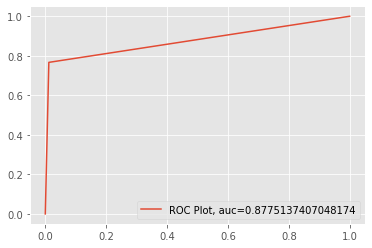

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model:
    post_pred = pm.sample_posterior_predictive(trace, samples=X_test.shape[0])

y_pred = post_pred['y'][-1].ravel().tolist()
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# GLM (With Chi-2 & Correlation Feature Selection)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 37800
Interrupted at 37,799 [18%]: Average Loss = 1,674.2
Sequential sampling (2 chains in 1 job)
NUTS: [post_operative_stroke, dialysis_newly_required, atrial_fibrillation, inotropics_used, ventricular_arrythmia, cardiac_arrest, heart_failure, Miscellaneous_complications, multi_system_failure, gastro_intestinal_complication, pleural_effusion, pneumonia, prolonged_ventilation, post_op_creatinine, Reopened_postCABG, hospital_complications, drainage_at_24_hours, additional_hours_ventilated, reintubated_hospital_stay, cryoprecipitate_units, fresh_frozen_plasma_units, red_blood_cell_units, additional_icu_hours, readmission_to_icu, initial_hours_ventilated, noda_arterial_conduits, platelet_units_A, fresh_frozen_plasma_units_A, red_blood_cell_units_A, IABP, cannulation_method_other, CABG_status, Mitral_regurgitation, anti_coagulants, nitratesIV, ventilator_used, arrhythmia, resuscitation, cardiogenic_shock, Cardiac_Presentation_on_Admission, NYHA_class, congestive_hea

Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 2220 seconds.
There were 4498 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9329 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/traceplot.py:210: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (49), generating only 20 plots
  UserWarning,


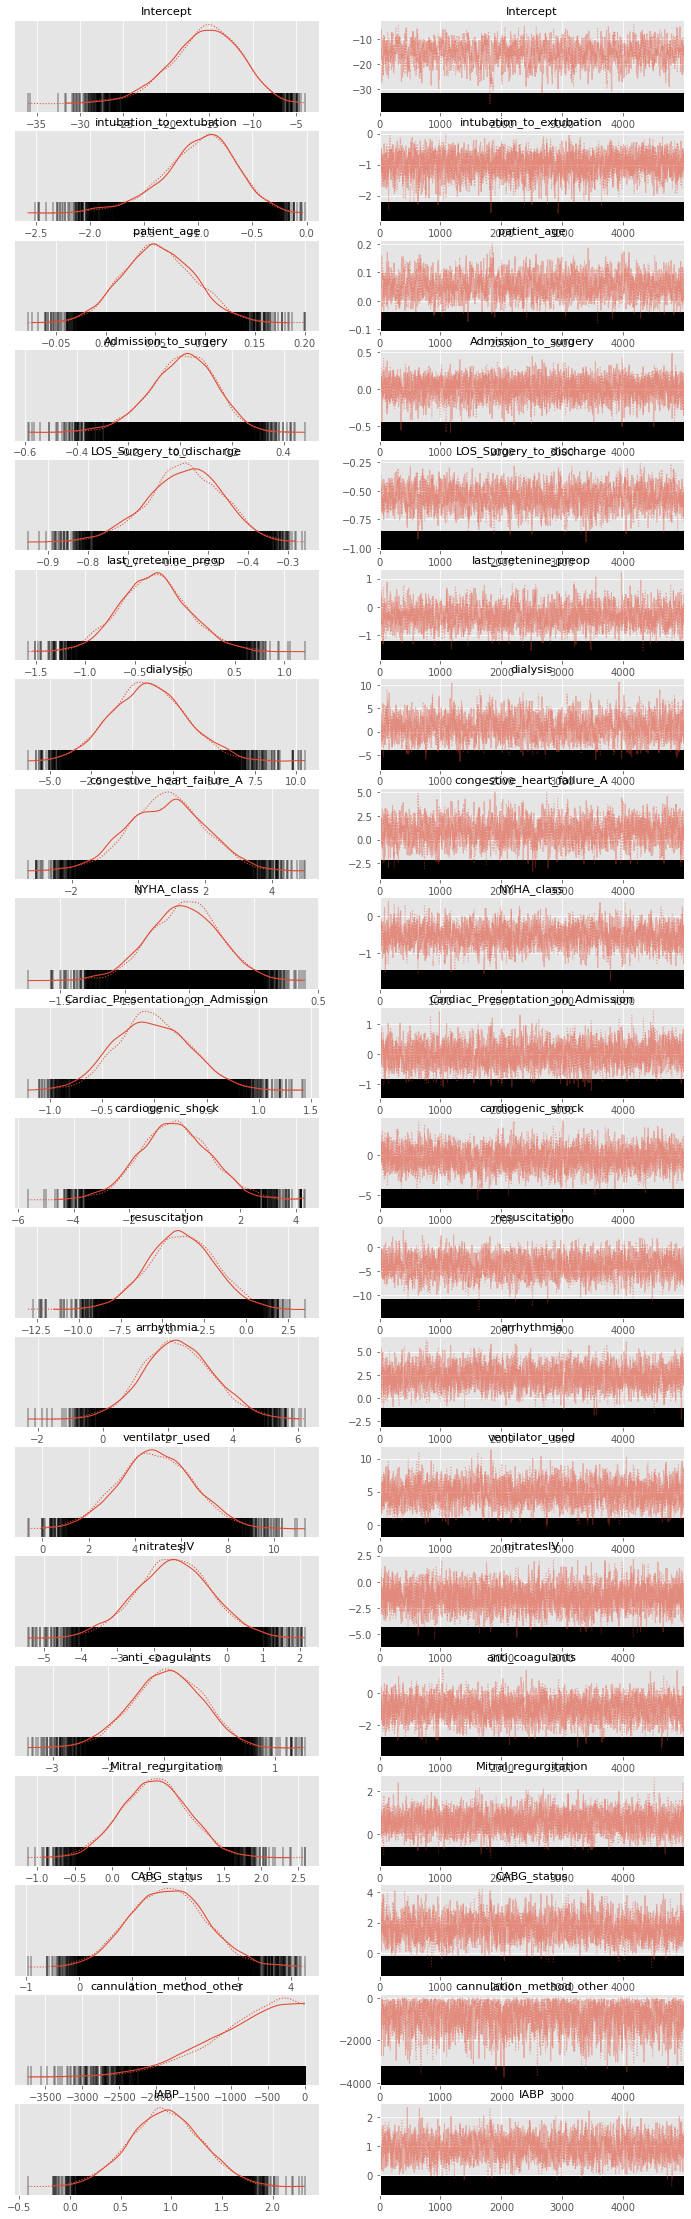

In [ ]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

data_Y, data_X = patsy.dmatrices(formula_like=formula_from_cols(new_new_data,'in_hospital_mortality'), data=new_new_data)
data_Y = np.asarray(data_Y).flatten()
labels = data_X.design_info.column_names
data_X = np.asarray(data_X)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

with pm.Model() as glm_model:
    # Set data container.
    data = pm.Data("data", X_train)
    # Define GLM family.
    family = pm.glm.families.Binomial()
    # Set priors.
    priors = {
        "Intercept": pm.Normal.dist(mu=0, sd=10),
        "beta": pm.Normal.dist(mu=0, sd=10, shape = X_train.shape[1]),
        #"x2": pm.Normal.dist(mu=0, sd=10),
        #"x1:x2": pm.Normal.dist(mu=0, sd=10),
    }
    # Specify model.
    pm.glm.GLM(y=Y_train, x=data, family=family, intercept=False, labels=labels)
    # Configure sampler.
    trace = pm.sample(5000, chains=2, tune=3000, target_accept=0.95, init = 'advi+adapt_diag')
    arviz.plot_trace(data=trace)
    arviz.summary(trace)


ROC is : 0.8794536049143227


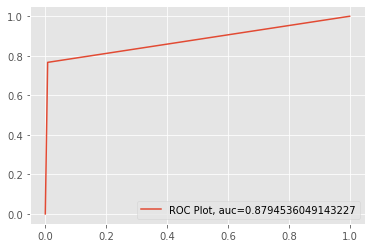

In [ ]:
# Compute the point prediction by taking the mean
# and defining the category via a threshold.
p_test_pred = ppc_test["y"].mean(axis=0)
y_pred = (p_test_pred >= 0.5).astype("int")
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()